In [1]:
# Install the library
!pip install transformers

import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

print("NLP Environment Ready!")

NLP Environment Ready!


In [2]:
# 1. Load the tokenizer and the model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

print("GPT-2 Model Loaded Successfully.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT-2 Model Loaded Successfully.


In [3]:
# Define a starting prompt
prompt = "In a world where artificial intelligence rules the planet,"

# Convert the text into numbers (tokens)
input_ids = tokenizer.encode(prompt, return_tensors='pt')

# Generate text (max_length=100 words, do_sample=True makes it creative)
output = model.generate(input_ids,
                        max_length=100,
                        num_return_sequences=1,
                        no_repeat_ngram_size=2,
                        do_sample=True,
                        top_k=50,
                        top_p=0.95,
                        temperature=0.7)

# Convert the numbers back into words
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print("--- AI Generated Story ---")
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


--- AI Generated Story ---
In a world where artificial intelligence rules the planet, the real question is how will we ever get to the point where we can make the machines understand how we interact with each other? This is a question that has been at the heart of the AI debate in recent years.

The AI problem is one of many, but the biggest problem has to do with human error. The problem with the human-machine interaction is that it is impossible to predict the future. Even if you could predict what would


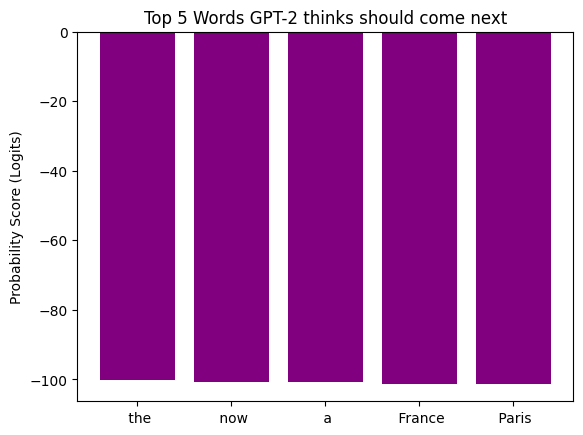

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's see the probability of the next word for a specific sentence
text = "The capital of France is"
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

# Get the top 5 predicted next words
last_token_logits = logits[0, -1, :]
top_5_tokens = torch.topk(last_token_logits, 5).indices.tolist()

words = [tokenizer.decode([t]) for t in top_5_tokens]
scores = torch.topk(last_token_logits, 5).values.tolist()

# Plotting the "Confidence"
plt.bar(words, scores, color='purple')
plt.title("Top 5 Words GPT-2 thinks should come next")
plt.ylabel("Probability Score (Logits)")
plt.show()